In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import numpy as np
import pandas as pd


In [2]:
input_xlsx = pd.read_excel( './data/E_Commerce_Dataset.xlsx' , sheet_name='E Comm' )
input_xlsx.to_csv(r'./data/E_Commerce_Dataset.csv', index = None, header=True)

In [3]:
input_xlsx.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
input_data = './data/E_Commerce_Dataset.csv'

mode = 'random_mode'
description_file = f'./out/{mode}/description.json'
synthetic_data = f'./out/{mode}/sythetic_data.csv'

In [6]:
data = pd.read_csv( input_data )
data.sample( 6 )

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5116,55117,0,30.0,Mobile Phone,2,15.0,Debit Card,Male,4.0,4,Others,4,Single,8,0,NaN,3.0,8.0,8.0,322.17
4015,54016,0,16.0,Mobile Phone,1,15.0,Debit Card,Male,3.0,4,Mobile Phone,3,Single,6,0,14.0,2.0,2.0,1.0,164.68
2224,52225,0,30.0,Mobile Phone,3,13.0,E wallet,Male,2.0,1,Laptop & Accessory,1,Married,1,1,18.0,0.0,1.0,9.0,152.20
1592,51593,0,7.0,Mobile Phone,1,8.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Married,7,0,13.0,0.0,5.0,9.0,159.57
2842,52843,0,27.0,Phone,3,13.0,E wallet,Male,3.0,4,Laptop & Accessory,3,Divorced,4,1,21.0,1.0,5.0,6.0,148.06
1651,51652,0,5.0,Mobile Phone,3,13.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Married,2,0,14.0,3.0,4.0,8.0,154.84


In [7]:
threshold_value = 20

num_tuples_to_generate = 32561

#categorical_attributes = {'education': True}

#candidate_keys = {'age': False}

In [8]:
describer = DataDescriber(category_threshold = threshold_value)
describer.describe_dataset_in_random_mode( input_data )
describer.save_dataset_description_to_file(description_file)

In [10]:
generator = DataGenerator( )
generator.generate_dataset_in_random_mode( num_tuples_to_generate, description_file )
generator.save_synthetic_data( synthetic_data )

### Comparando Dados

In [11]:
input_df = pd.read_csv( input_data, skipinitialspace=True )
synthetic_df = pd.read_csv( synthetic_data )

attribute_description = read_json_file( description_file )['attribute_description']

inspector = ModelInspector( input_df, synthetic_df, attribute_description)

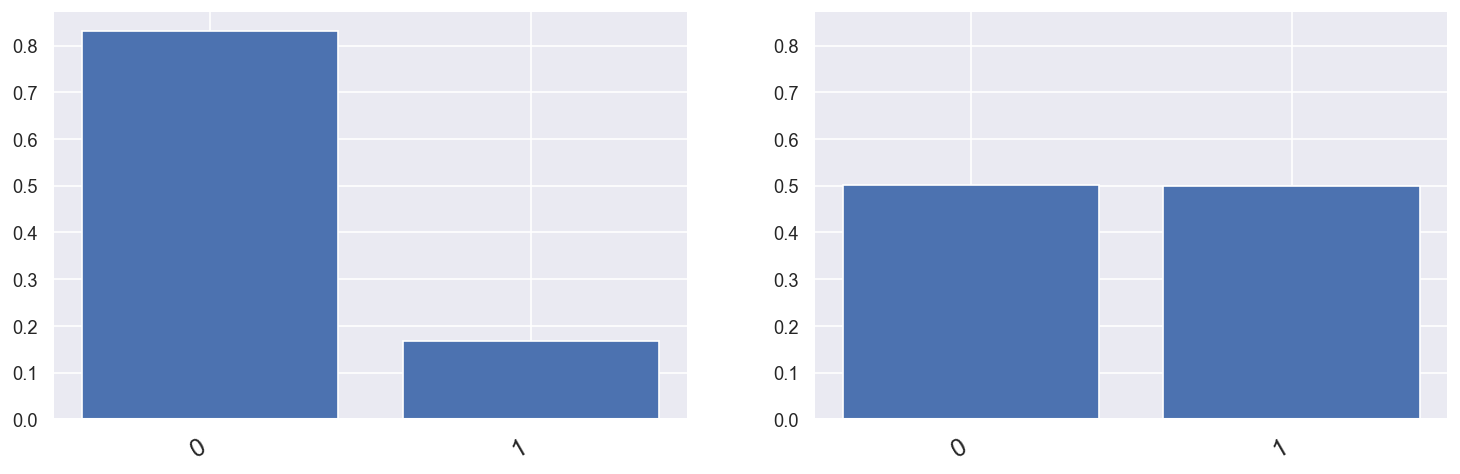

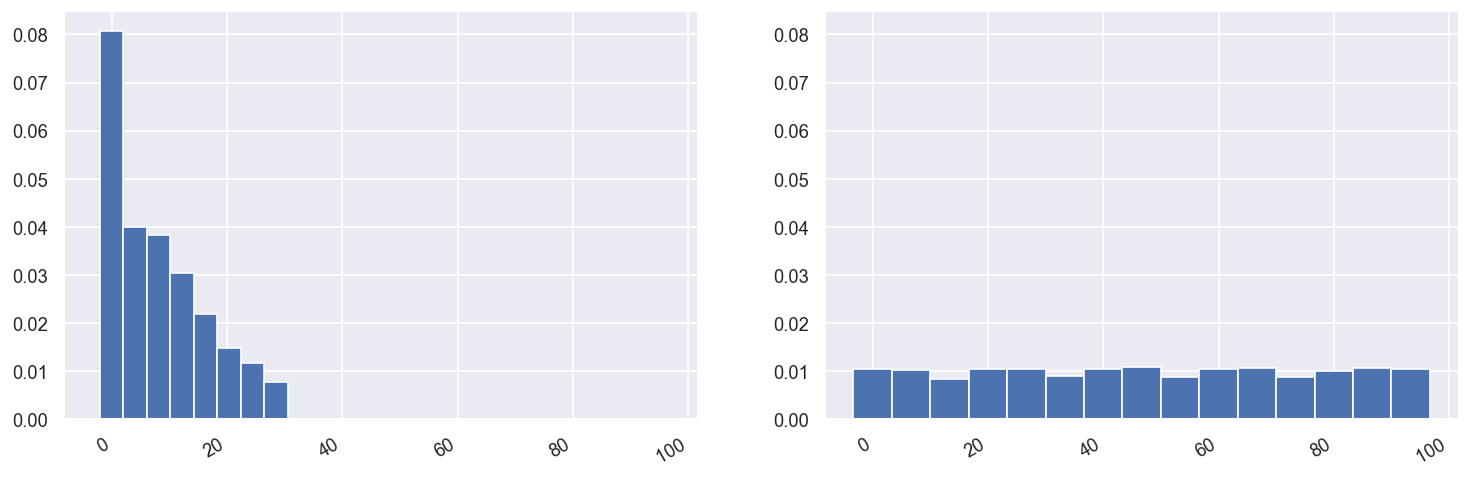

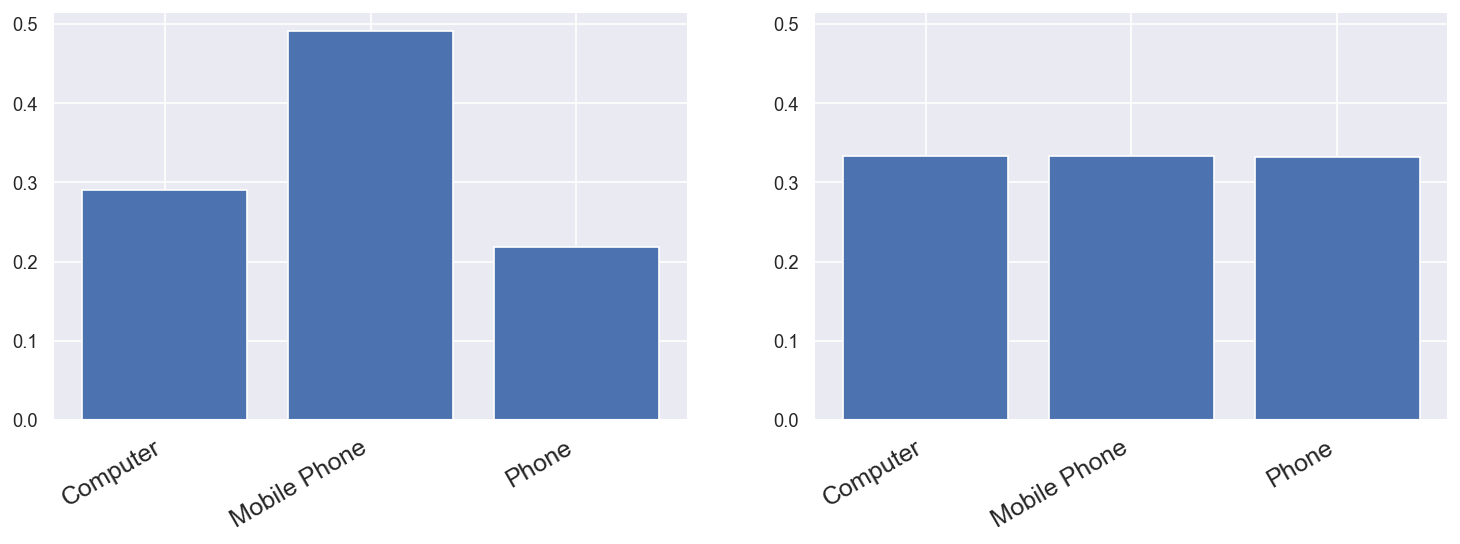

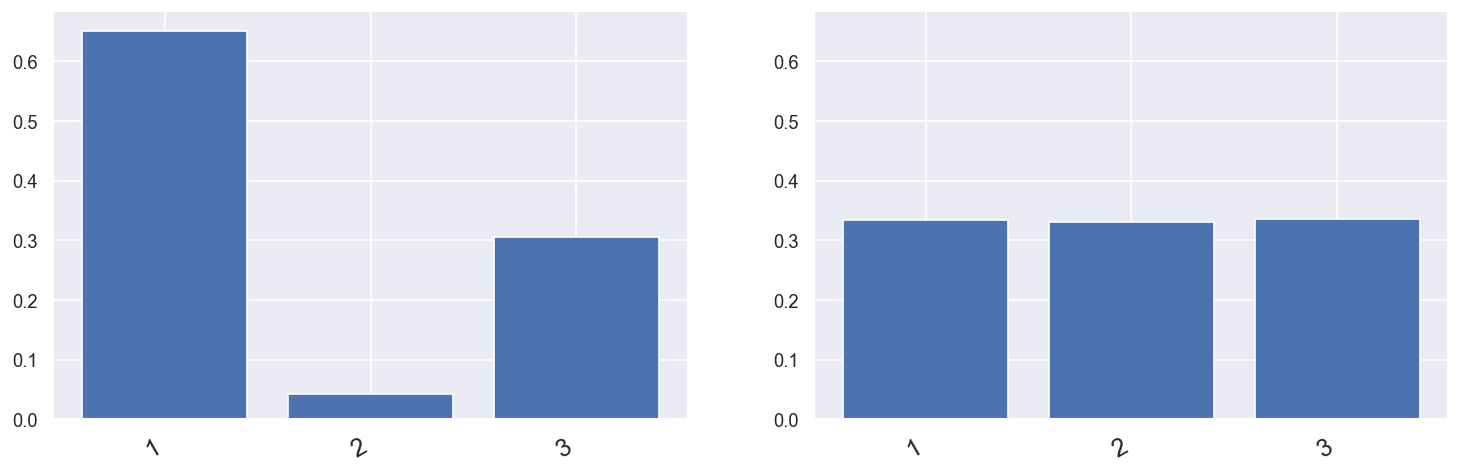

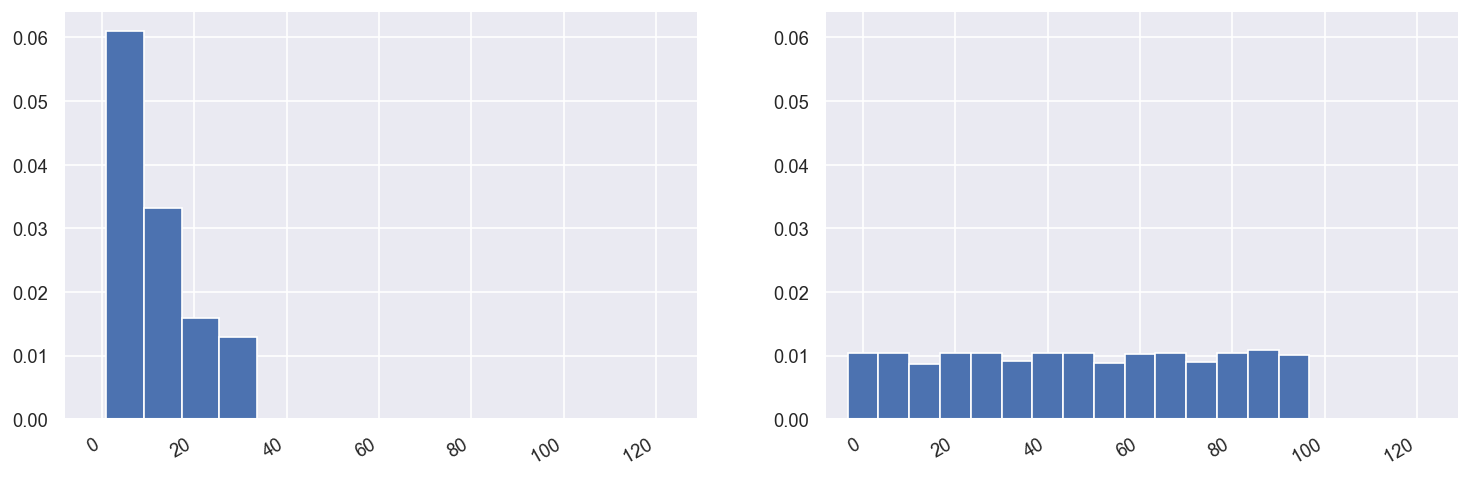

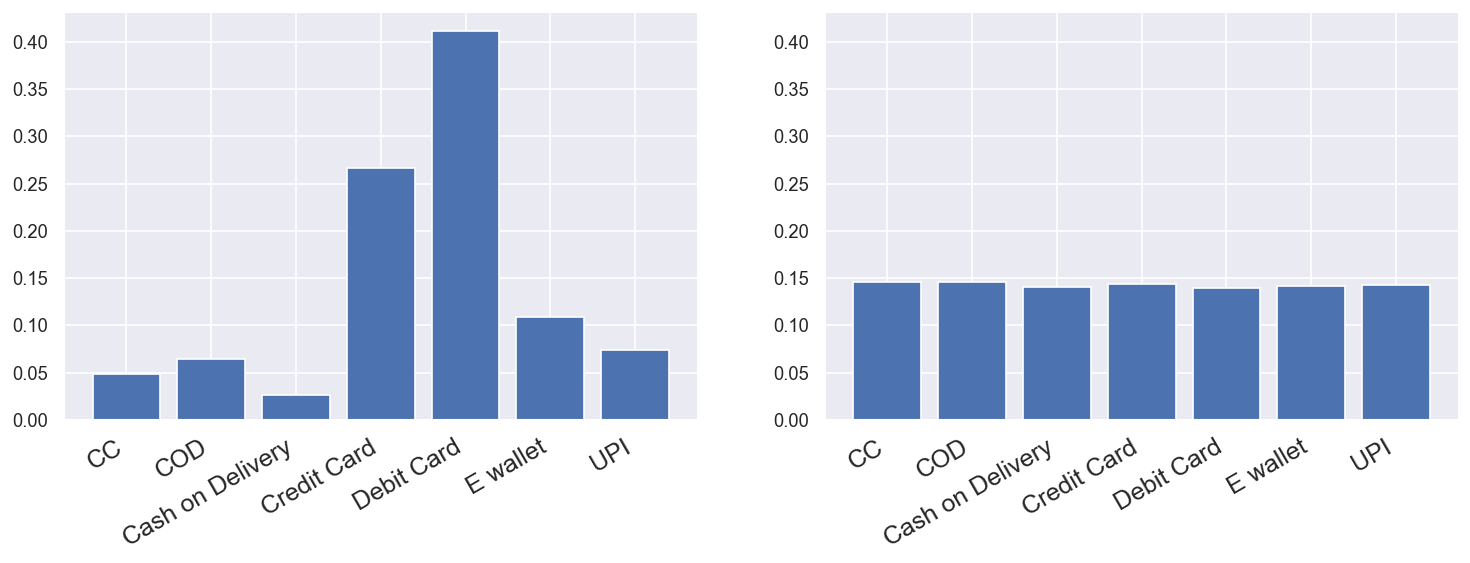

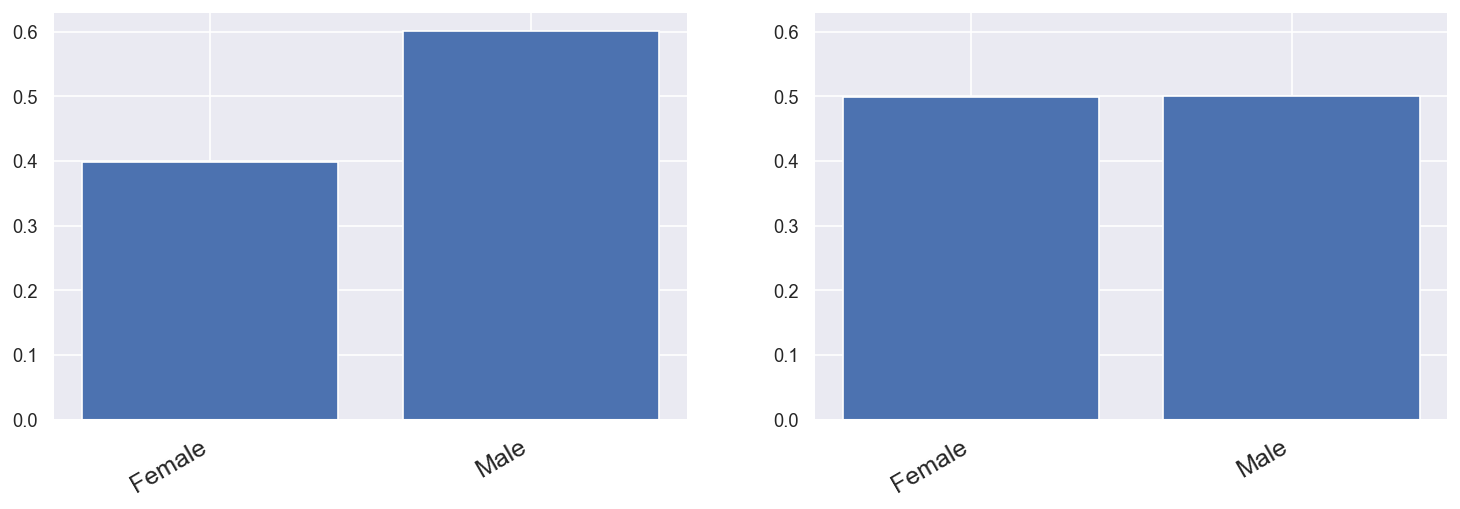

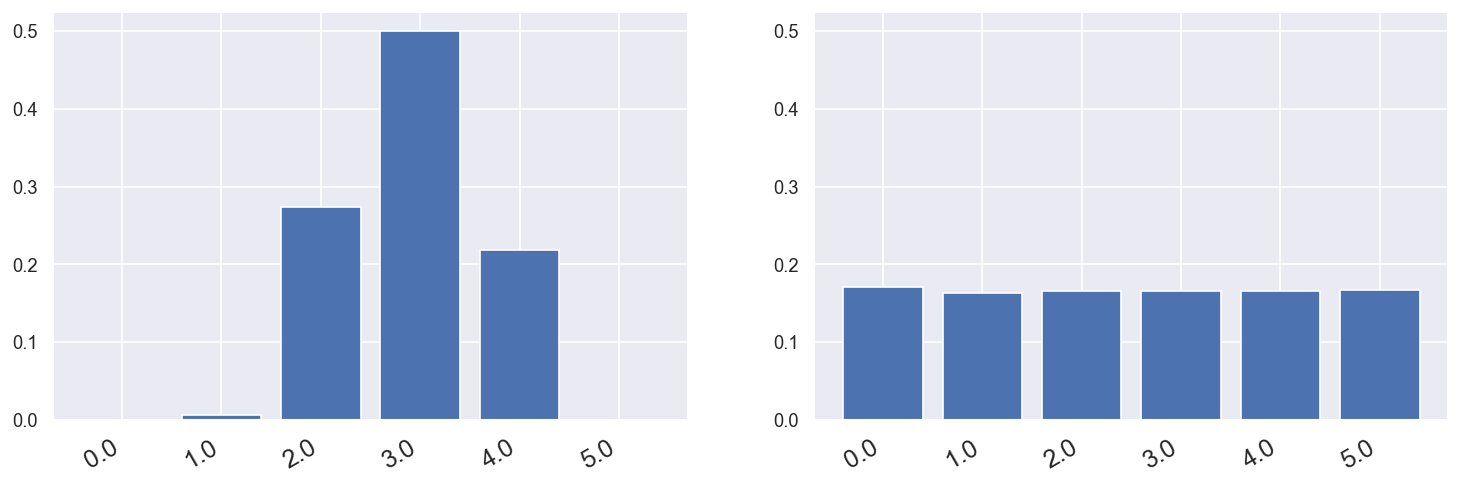

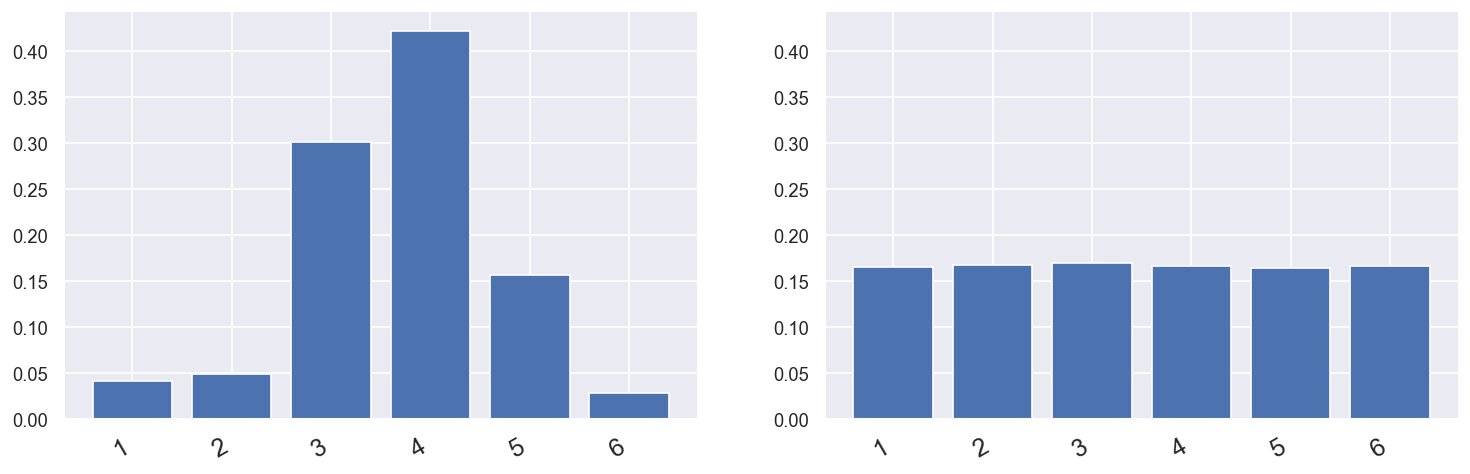

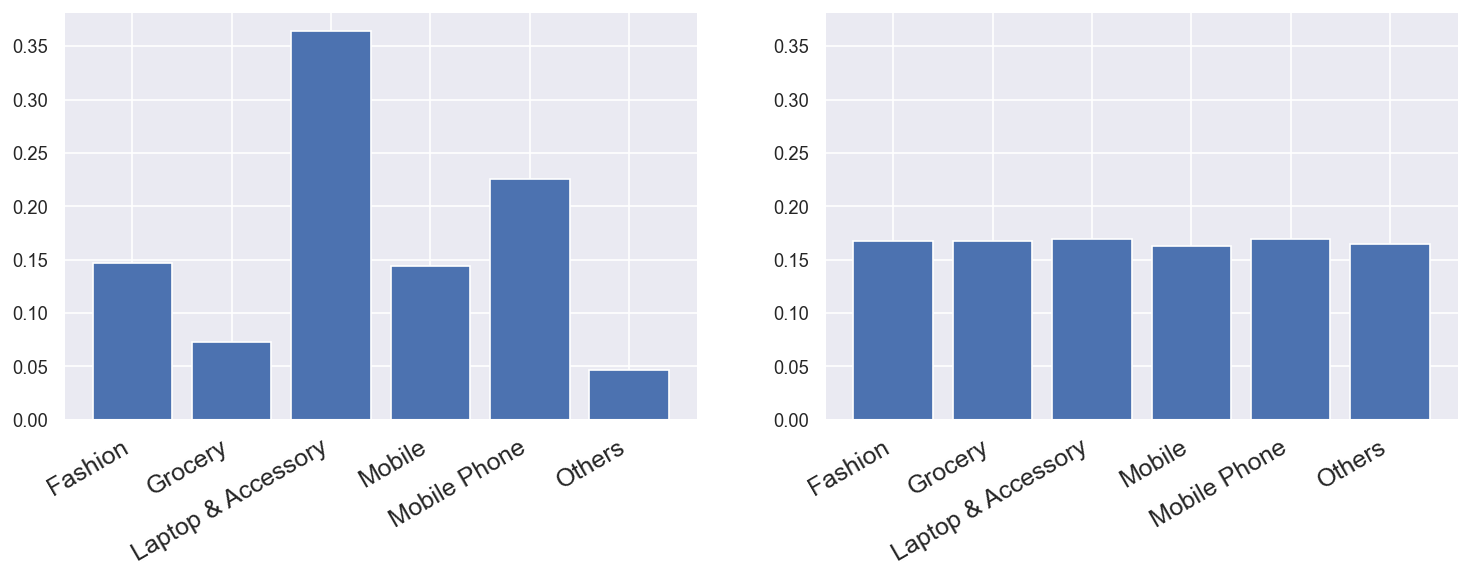

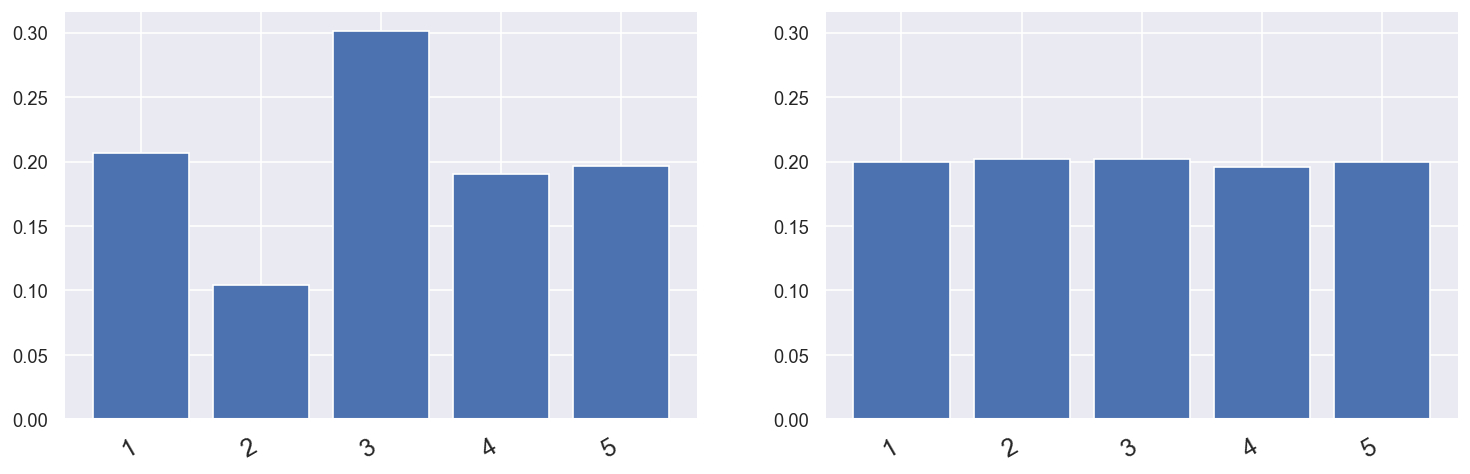

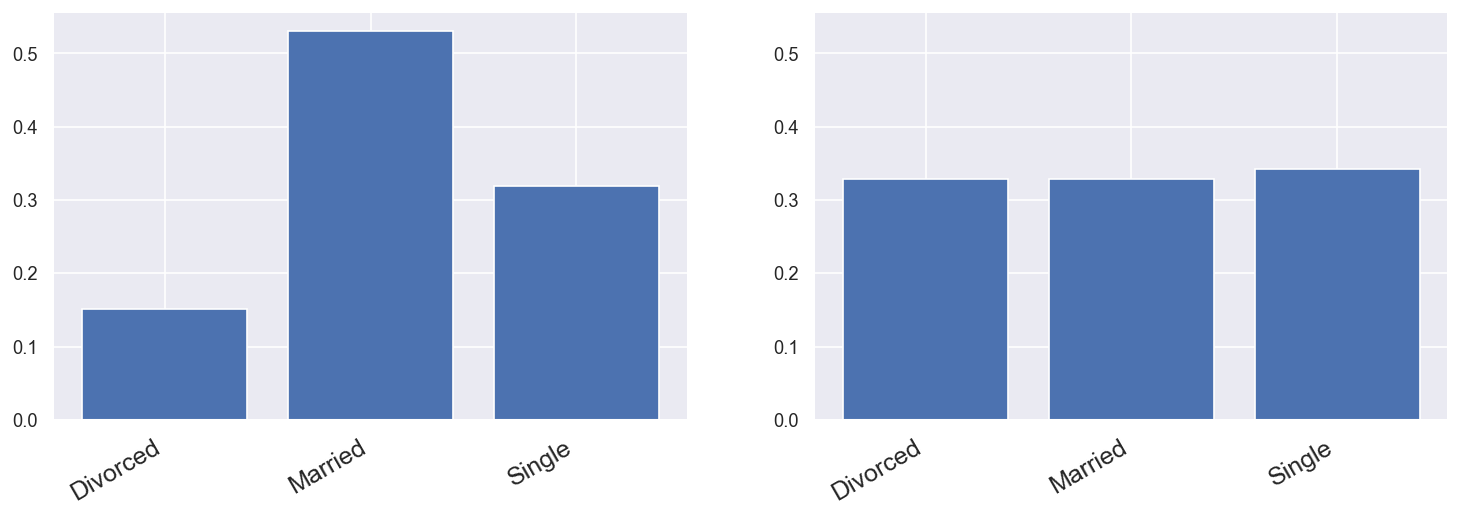

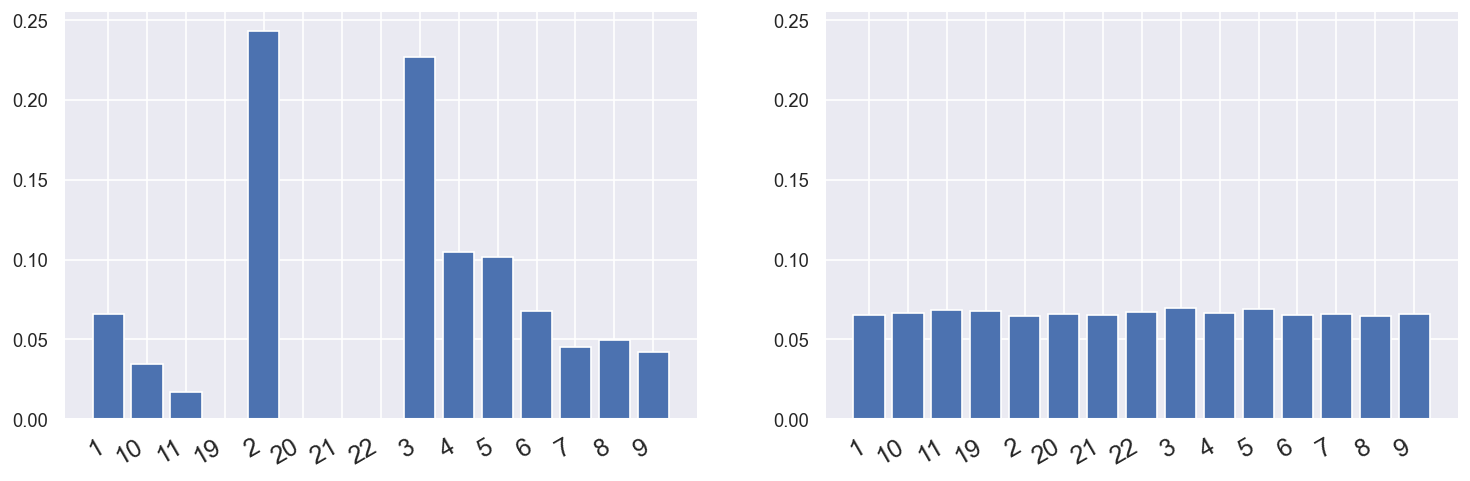

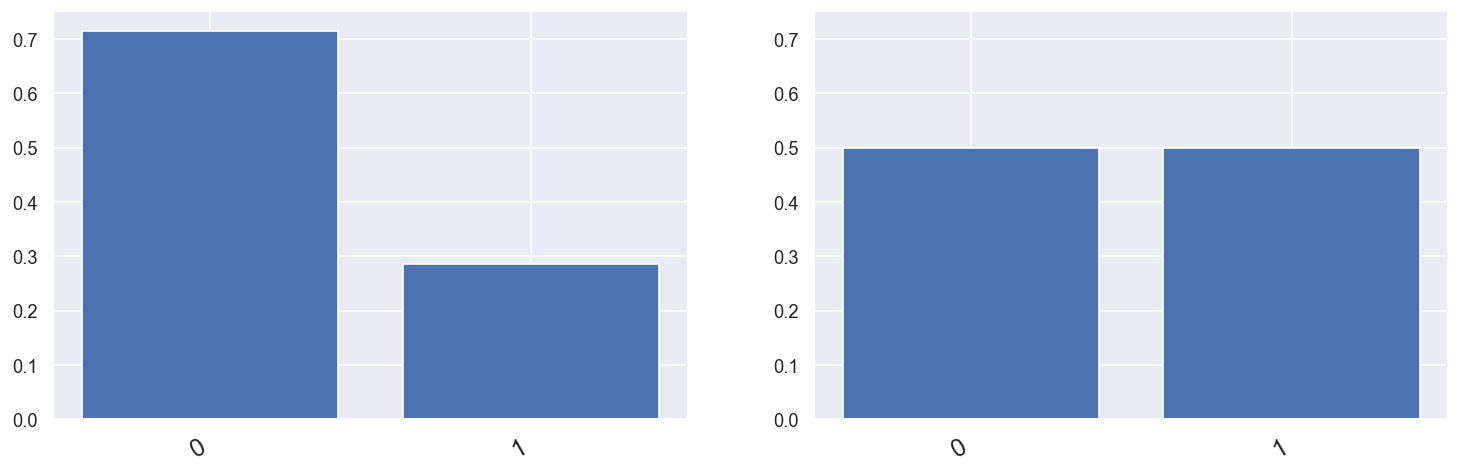

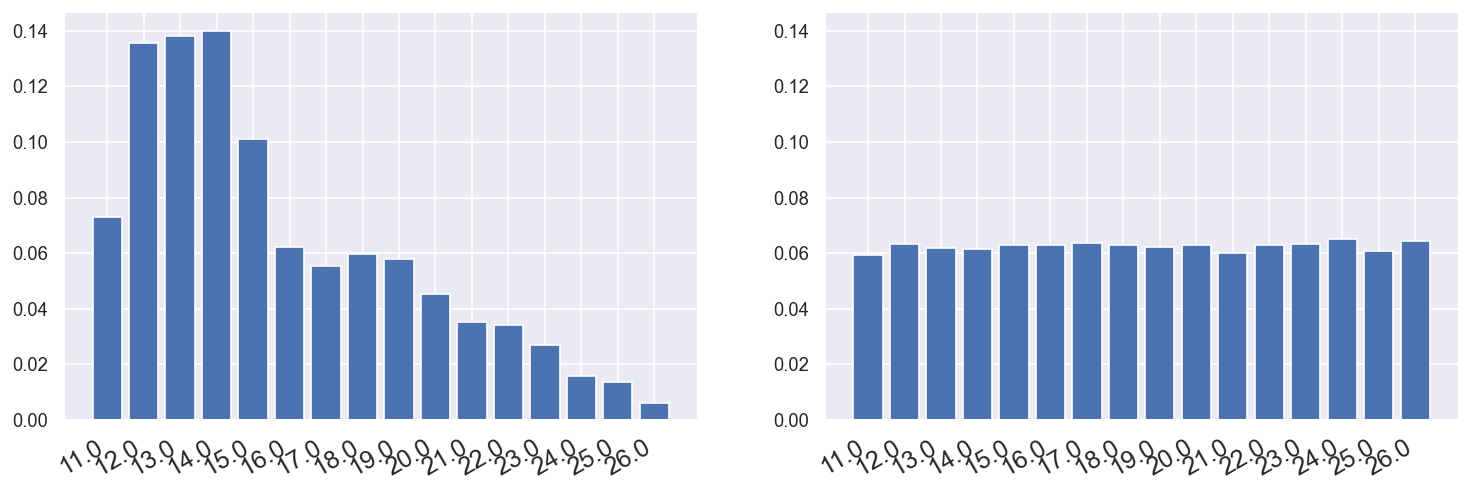

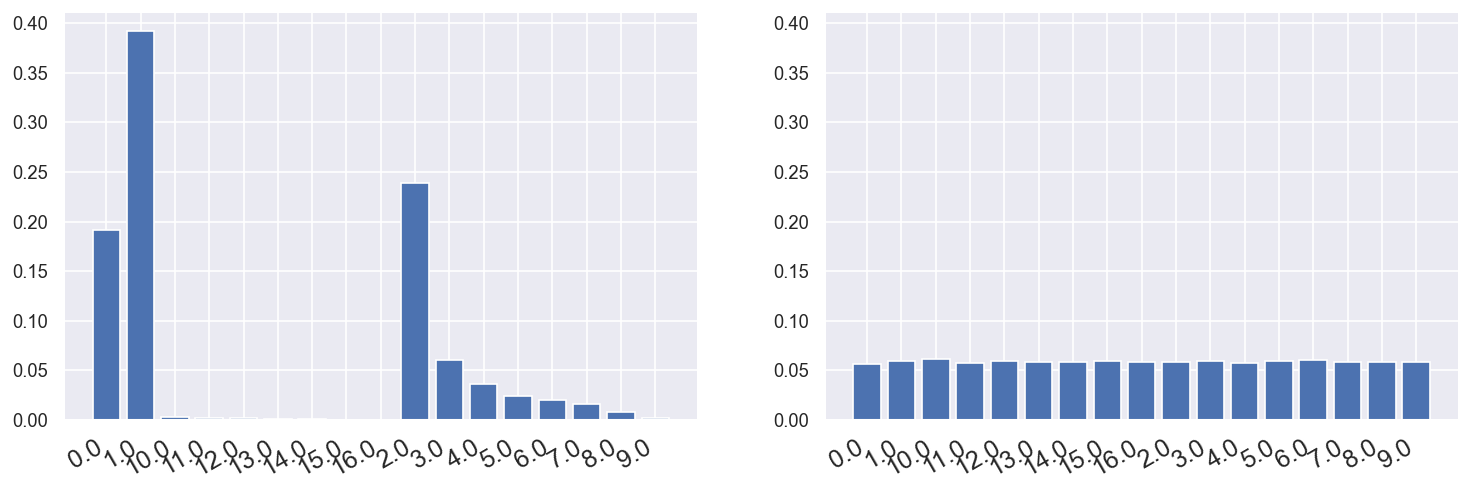

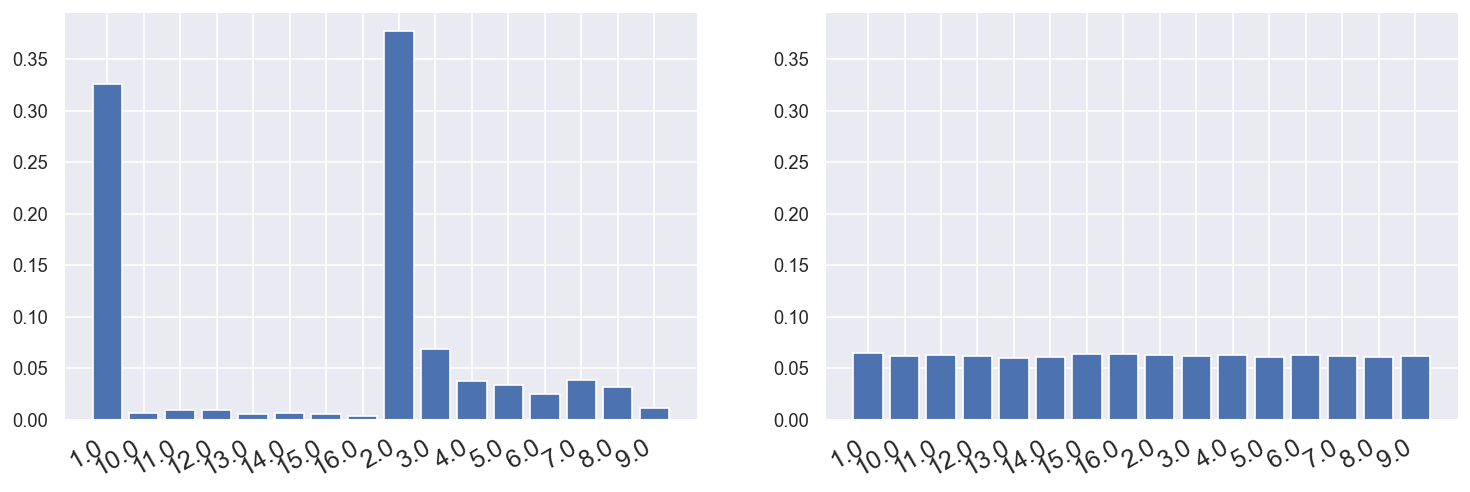

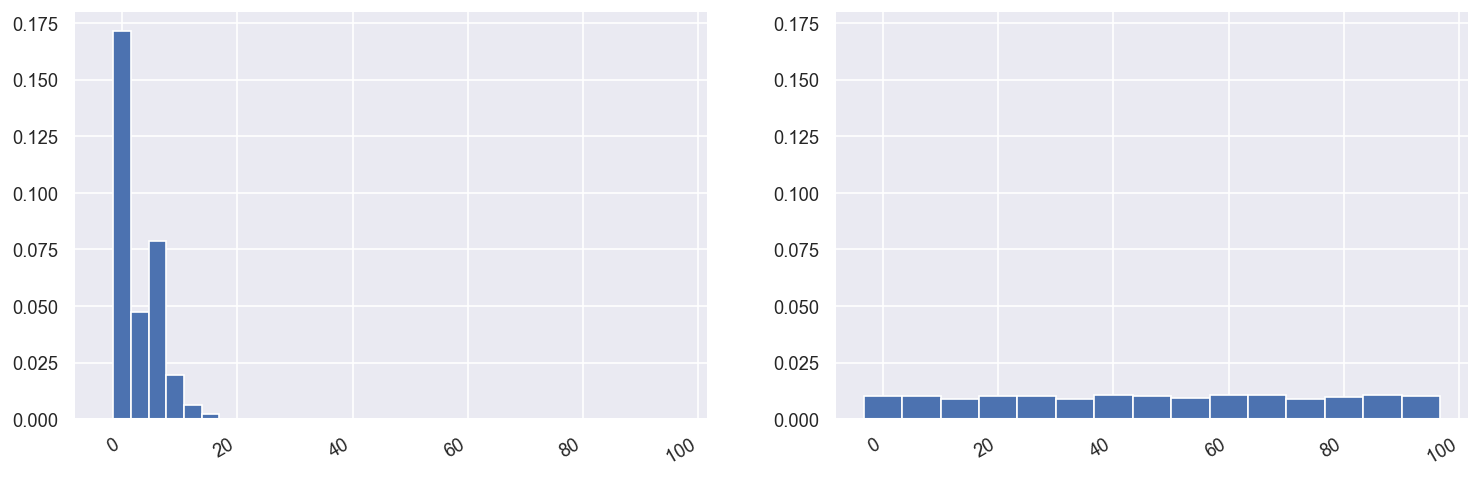

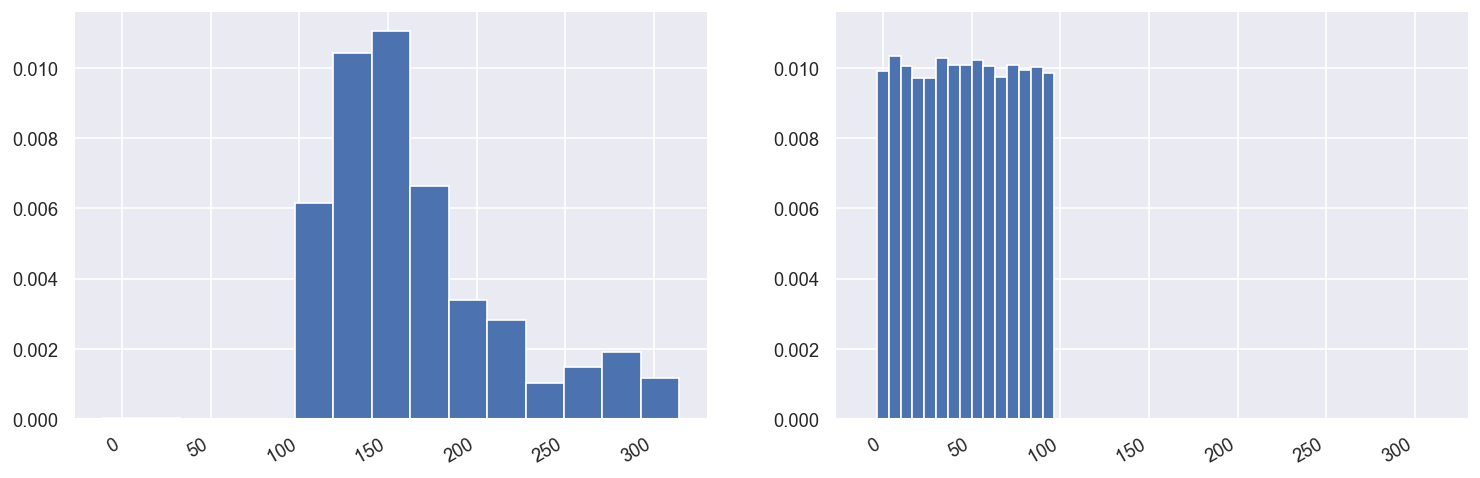

In [12]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms( attribute )

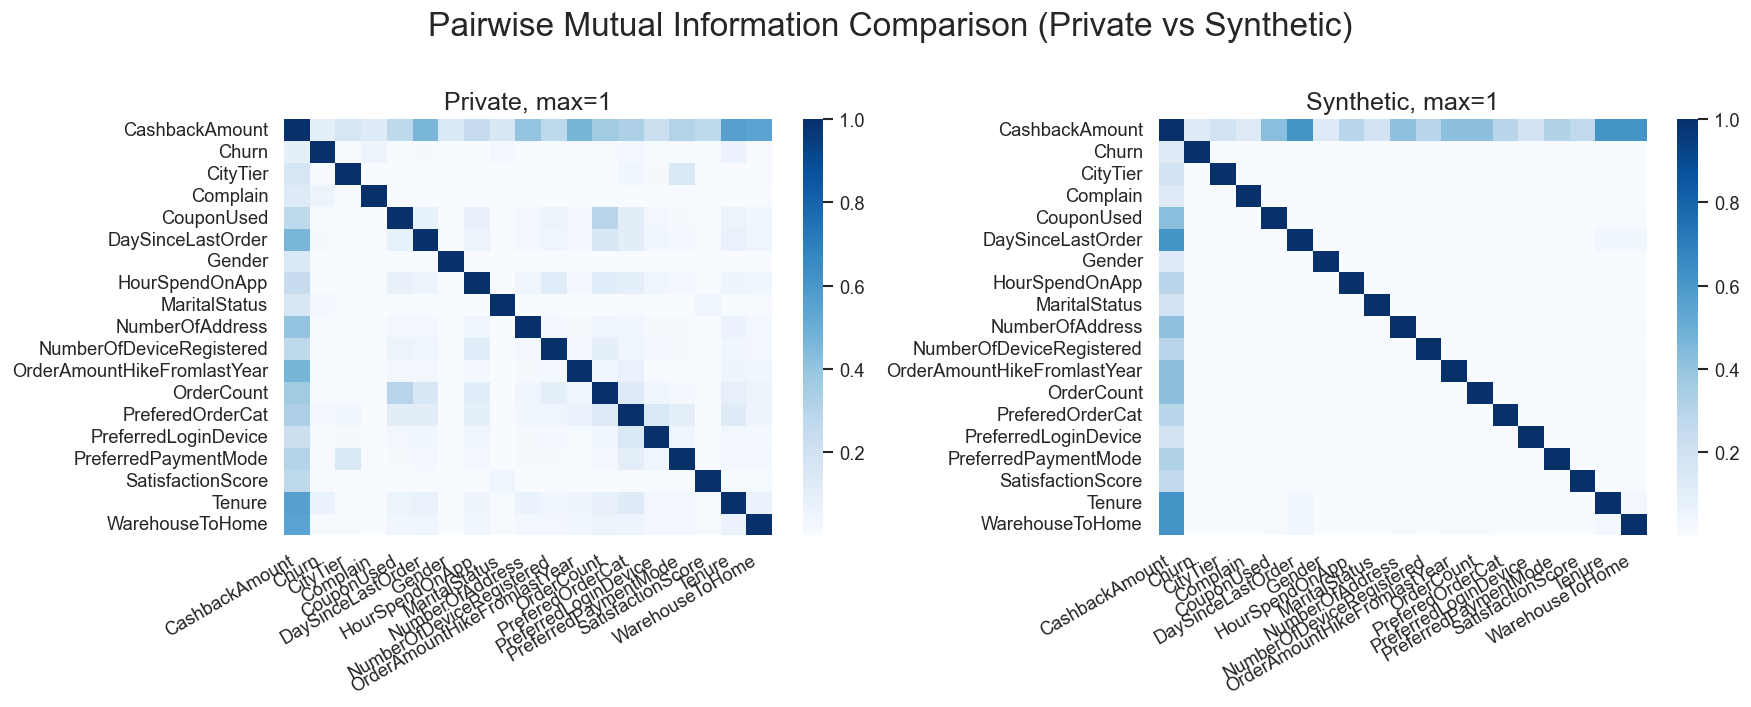

In [13]:
inspector.mutual_information_heatmap()

In [ ]:
synthetic_df.head()